Q1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.

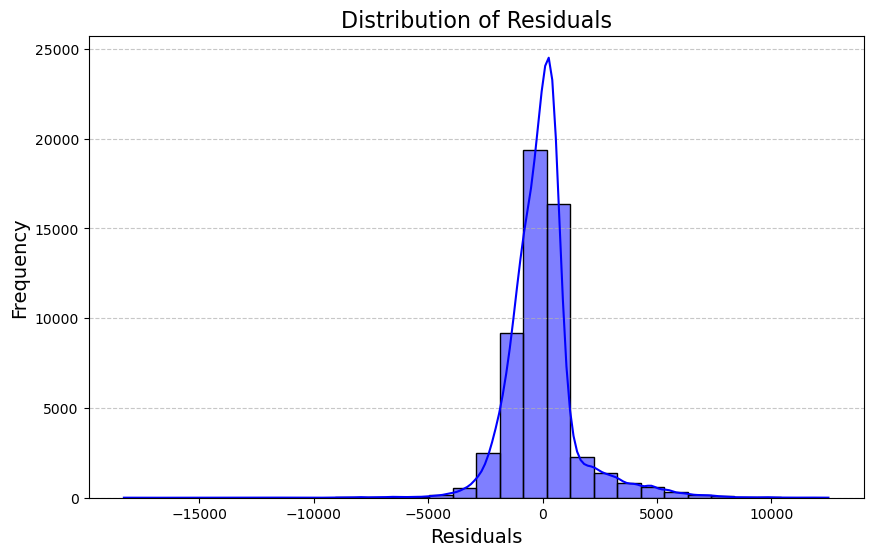

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Select features for regression (use a subset of columns for simplicity)
# We'll predict 'price' using 'carat', 'depth', and 'table' as predictors.
features = ["carat", "depth", "table"]

# Drop rows with missing values (if any)
diamonds = diamonds.dropna()

# Extract predictor variables (X) and the target variable (y)
X = diamonds[features]
y = diamonds["price"]

# Add a constant term for the intercept (required for statsmodels)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Get the residuals
residuals = model.resid

# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color="blue", edgecolor="black")
plt.title("Distribution of Residuals", fontsize=16)
plt.xlabel("Residuals", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# Optional: Print the model summary for context
#print(model.summary())

Q2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.

In [4]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Example data: true values (y_true) and predicted values (y_pred)
y_true = np.array([3.0, -0.5, 2.0, 7.0])
y_pred = np.array([2.5, 0.0, 2.0, 8.0])

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.375
Mean Absolute Error (MAE): 0.5
Root Mean Squared Error (RMSE): 0.6123724356957945


Q3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.


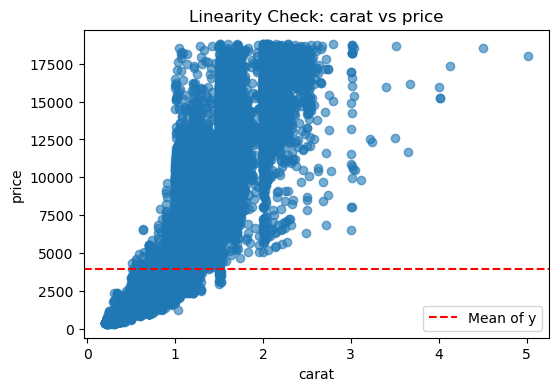

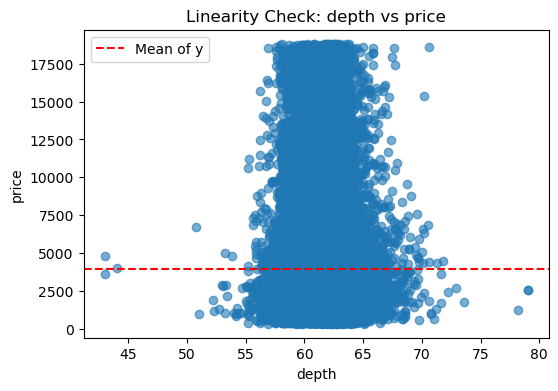

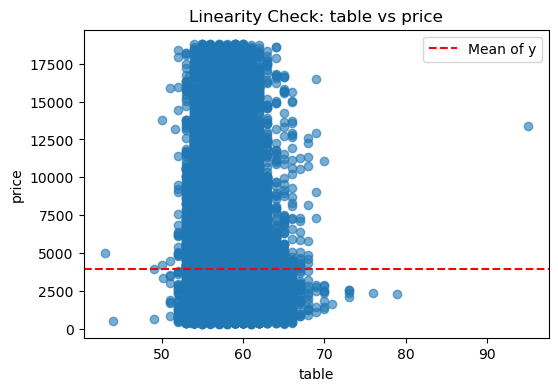

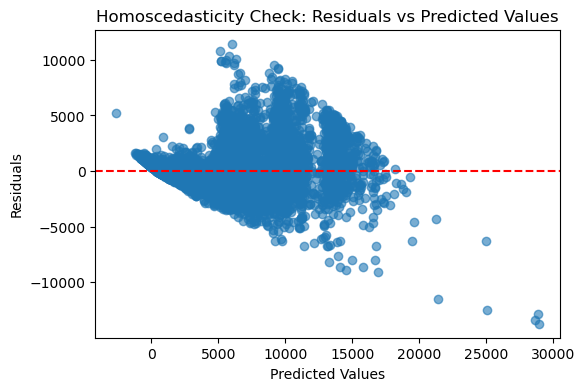

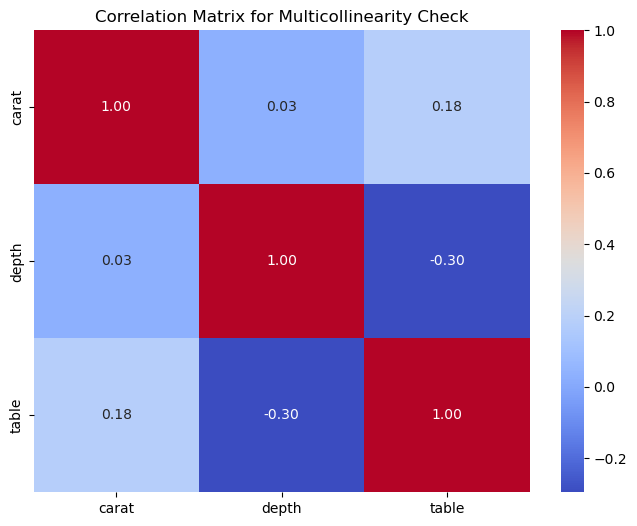

Mean Squared Error (MSE): 2289438.0914799566


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the diamonds dataset
data = sns.load_dataset("diamonds")

# Select features for regression (use a subset of columns for simplicity)
# We'll predict 'price' using 'carat', 'depth', and 'table' as predictors.
features = ["carat", "depth", "table"]

# Drop rows with missing values (if any)
data = data.dropna()

# Specify dependent and independent variables
X_columns = ['carat', 'depth', 'table']  # Replace with your feature names
y_column = 'price'  # Replace with your target variable name

X = data[X_columns]
y = data[y_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Assumption 1: Linearity (scatter plot)
for col in X_columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(data[col], y, alpha=0.6)
    plt.title(f'Linearity Check: {col} vs {y_column}')
    plt.xlabel(col)
    plt.ylabel(y_column)
    plt.axhline(y.mean(), color='red', linestyle='--', label='Mean of y')
    plt.legend()
    plt.show()

# Assumption 2: Homoscedasticity (residuals plot)
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Homoscedasticity Check: Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Assumption 3: Multicollinearity (correlation matrix)
corr_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Multicollinearity Check')
plt.show()

# Print summary for diagnostics
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

Q4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Step 1: Load or generate data
def generate_data():
    np.random.seed(42)
    X = np.random.rand(500, 5)  # 500 samples, 5 features
    y = X @ np.array([2.5, -1.3, 0.7, 4.1, -3.2]) + np.random.normal(0, 0.5, 500)  # Linear relation with noise
    return pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(X.shape[1])]), pd.Series(y, name="Target")

# Generate data
X, y = generate_data()

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define a function to create pipelines and evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("regressor", model)
        ])
        
        # Cross-validation
        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
        
        # Train and test the model
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        test_mse = mean_squared_error(y_test, y_pred)
        
        results[name] = {
            "Cross-Validation MSE": -np.mean(cv_scores),
            "Test MSE": test_mse
        }
    return results

# Step 4: Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Step 5: Evaluate models
results = evaluate_models(models, X_train, X_test, y_train, y_test)

# Step 6: Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print("-")


Model: Linear Regression
  Cross-Validation MSE: 0.2323
  Test MSE: 0.2181
-
Model: Random Forest Regressor
  Cross-Validation MSE: 0.4328
  Test MSE: 0.3782
-
Model: Support Vector Regressor
  Cross-Validation MSE: 0.3209
  Test MSE: 0.3033
-


Q5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.

In [5]:
# Importing necessary libraries

import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score


# Generating a synthetic dataset

np.random.seed(42)

X = 2 * np.random.rand(100, 1)

y = 4 + 3 * X + np.random.randn(100, 1)



# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Implementing the linear regression model

model = LinearRegression()

model.fit(X_train, y_train)



# Making predictions

y_pred = model.predict(X_test)



# Extracting coefficients, intercept, and R-squared score

coefficients = model.coef_[0]

intercept = model.intercept_[0]

r_squared = r2_score(y_test, y_pred)
print(f"coefficents:{coefficients} \n ")
print(f"intercept:{intercept} \n ")
print(f"r_squared:{r_squared} \n ")


coefficents:[2.79932366] 
 
intercept:4.142913319458566 
 
r_squared:0.8072059636181392 
 


Q6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           6.69e-34
Time:                        20:35:14   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

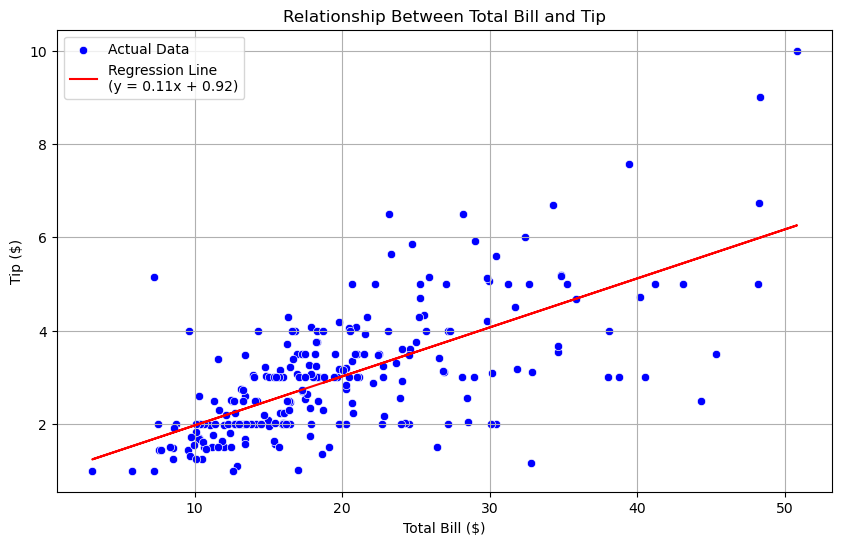

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Extract the features (total_bill) and target (tip)
X = tips['total_bill'].values.reshape(-1, 1)
y = tips['tip'].values

# Perform simple linear regression using scikit-learn
model = LinearRegression()
model.fit(X, y)

# Get the slope (coefficient) and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Predict tips based on the model
y_pred = model.predict(X)

# Display a statistical summary using statsmodels
X_sm = sm.add_constant(X)  # Add a constant term for the intercept
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips, color='blue', label='Actual Data')
plt.plot(tips['total_bill'], y_pred, color='red', label=f'Regression Line\n(y = {slope:.2f}x + {intercept:.2f})')
plt.title('Relationship Between Total Bill and Tip')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.legend()
plt.grid(True)
plt.show()



Q7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.

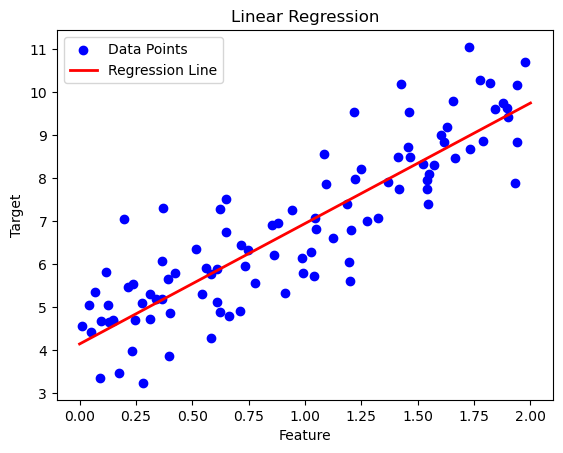

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 data points with one feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with some noise

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
X_new = np.array([[0], [2]])  # Points to plot the regression line (min and max of X)
y_pred = model.predict(X_new)

# Plot the data and the regression line
plt.scatter(X, y, color="blue", label="Data Points")
plt.plot(X_new, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression")
plt.legend()
plt.show()


Q8. Write a Python script that pickles a trained linear regression model and saves it to a file.

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import pickle

# Generate synthetic data for regression
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model to a file using pickle
model_filename = "linear_regression_model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(model, file)

print(f"Trained model has been saved to '{model_filename}'.")

# Optional: Load the model back to verify
with open(model_filename, "rb") as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully. Verifying...")
print(f"Model coefficients: {loaded_model.coef_}")
print(f"Model intercept: {loaded_model.intercept_}")

Trained model has been saved to 'linear_regression_model.pkl'.
Model loaded successfully. Verifying...
Model coefficients: [44.24418216]
Model intercept: 0.09922221422588251


Q9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.

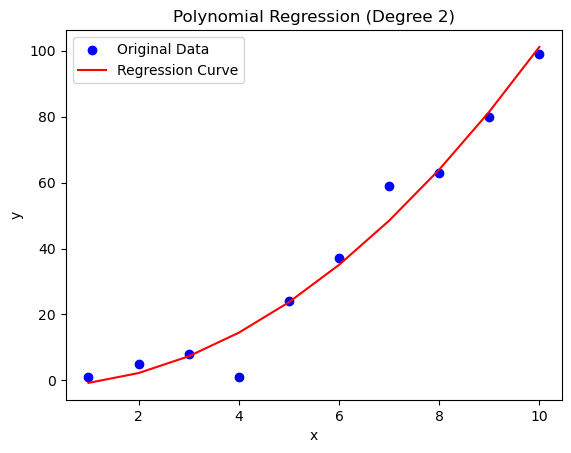

Model Coefficients: [ 0.         -0.13106061  1.04166667]
Model Intercept: -1.6833333333333371
Mean Squared Error: 31.58469696969697


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example dataset (replace with your own data)
# x: independent variable, y: dependent variable
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 5 ,8 , 1, 24, 37, 59,63 ,80, 99])


# Reshape x for sklearn (it expects 2D arrays for features)
x = x.reshape(-1, 1)

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(x_poly, y)

# Make predictions
y_pred = model.predict(x_poly)

# Plot the original data and the regression curve
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, y_pred, color='red', label='Regression Curve')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Print model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)


Q10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.


In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate synthetic data for simple linear regression
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) *10  # Random values for X between 0 and 10
y = 1.5 * X + np.random.randn(100, 1) * 2  # Linear relationship with some noise

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X, y)

# Print the model's coefficient and intercept
coefficient = model.coef_[0][0]
intercept = model.intercept_[0]

print(f"coefficient : {coefficient}\n")
print(f"intercept : {intercept}") 


coefficient : 1.4080453545753933

intercept : 0.43019231509349787


Q11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.

Degree 1:
  MSE: 0.0381
  Coefficients: [[0.         1.27100203]]
  Intercept: [-0.11013184]

Degree 2:
  MSE: 0.0346
  Coefficients: [[ 0.          1.26043991 -0.19865921]]
  Intercept: [-0.0404331]

Degree 3:
  MSE: 0.0309
  Coefficients: [[ 0.          1.0154213  -0.18652251  0.40803989]]
  Intercept: [-0.04312432]

Degree 5:
  MSE: 0.0305
  Coefficients: [[ 0.          0.96078413  0.04685993  0.68023868 -0.27142447 -0.25469318]]
  Intercept: [-0.06737237]



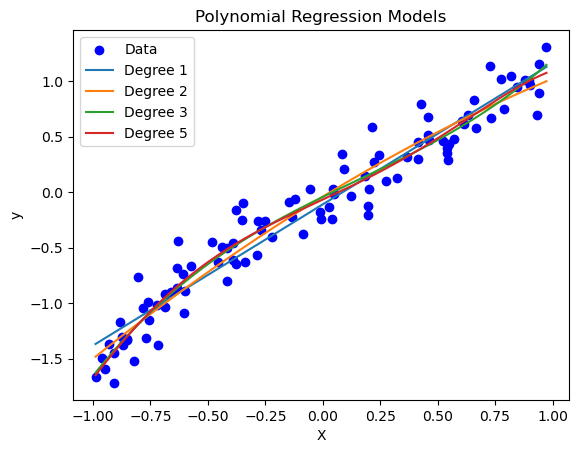

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset
def generate_data():
    np.random.seed(42)
    X = 2 * np.random.rand(100, 1) - 1  # Random values in the range [-1, 1]
    y = 0.5 * X**3 - 0.3 * X**2 + X + 0.2 * np.random.randn(100, 1)  # Cubic function with noise
    return X, y

# Fit polynomial regression and calculate performance metrics
def fit_and_evaluate(X, y, degrees):
    results = {}

    for degree in degrees:
        # Create polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(X)

        # Fit the model
        model = LinearRegression()
        model.fit(X_poly, y)

        # Predict and calculate metrics
        y_pred = model.predict(X_poly)
        mse = mean_squared_error(y, y_pred)

        results[degree] = {
            'model': model,
            'mse': mse,
            'coefficients': model.coef_,
            'intercept': model.intercept_,
        }

    return results

# Plot results
def plot_results(X, y, results):
    plt.scatter(X, y, color='blue', label='Data')
    X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

    for degree, info in results.items():
        poly_features = PolynomialFeatures(degree=degree)
        X_plot_poly = poly_features.fit_transform(X_plot)
        y_plot = info['model'].predict(X_plot_poly)
        plt.plot(X_plot, y_plot, label=f'Degree {degree}')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Polynomial Regression Models')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Generate data
    X, y = generate_data()

    # Define polynomial degrees to test
    degrees = [1, 2, 3, 5]

    # Fit and evaluate models
    results = fit_and_evaluate(X, y, degrees)

    # Display results
    for degree, info in results.items():
        print(f"Degree {degree}:")
        print(f"  MSE: {info['mse']:.4f}")
        print(f"  Coefficients: {info['coefficients']}")
        print(f"  Intercept: {info['intercept']}")
        print()

    # Plot the results
    plot_results(X, y, results)


12. Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.


In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate sample data
np.random.seed(42)
n_samples = 100

# Two features (X1, X2) and a target variable (y)
X1 = np.random.rand(n_samples) * 10
X2 = np.random.rand(n_samples) * 20
y = 3 * X1 + 2 * X2 + np.random.randn(n_samples) * 5

# Combine features into a single array
X = np.column_stack((X1, X2))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the coefficients, intercept, and R-squared score
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared score:", r2_score(y_test, y_pred))

Coefficients: [2.96759557 1.98783043]
Intercept: 0.4269761586415797
R-squared score: 0.8286766176539112


Q13  Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.


Intercept: 4.215096157546748
Coefficient: 2.770113386438483


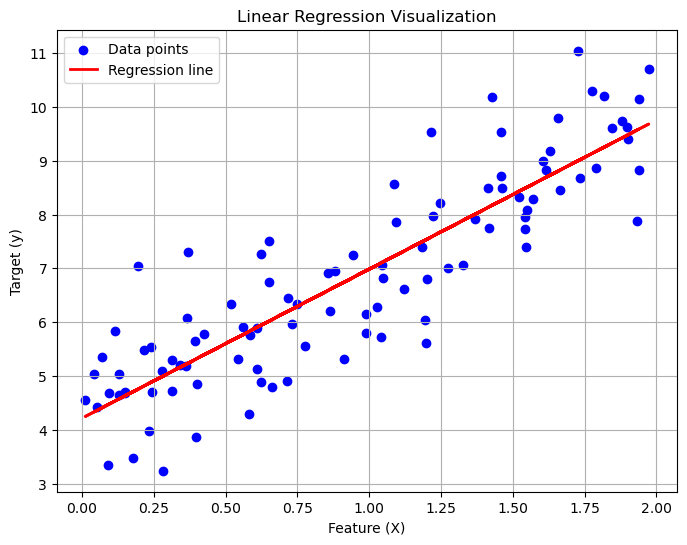

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     326.7
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           5.66e-33
Time:                        17:14:59   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      98   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2151      0.170     24.753      0.0

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Generate synthetic data
np.random.seed(42)  # For reproducibility
n_samples = 100
X = 2 * np.random.rand(n_samples,1)  # Feature values (independent variable)

y = 4 + 3 * X + np.random.randn(n_samples, 1)  # Target values (dependent variable) with noise

# Step 2: Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients of the regression line
intercept = model.intercept_[0]
coefficient = model.coef_[0][0]
print(f"Intercept: {intercept}")
print(f"Coefficient: {coefficient}")

# Step 3: Predict values using the model
y_pred = model.predict(X)

# Step 4: Visualize the regression line along with data points
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred, color="red", linewidth=2, label="Regression line")
plt.title("Linear Regression Visualization")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid()
plt.show()

# Step 5: Calculate and print the mean squared error
# Display a statistical summary using statsmodels
X_sm = sm.add_constant(X)  # Add a constant term for the intercept
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Q14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.


Q14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(dataframe):
    """
    Calculate Variance Inflation Factor (VIF) for each feature in a DataFrame.
    
    Args:
        dataframe (pd.DataFrame): A DataFrame containing the features (independent variables).
    
    Returns:
        pd.DataFrame: A DataFrame containing features and their respective VIF values.
    """
    # Add a constant column for intercept
    X = add_constant(dataframe)
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    # Exclude the constant column
    return vif_data[vif_data["Feature"] != "const"]

# Example usage
if __name__ == "__main__":
    # Sample dataset
    # Load the diamonds dataset
    diamonds = sns.load_dataset("diamonds")
    #diamonds = pd.DataFrame(diamonds)
    #features = ["carat", "depth", "table"]
   
    df = diamonds.loc[0:53939,["carat","depth","table"]] 
    print(df)
    # Calculate VIF
    vif_result = calculate_vif(df)
    print(vif_result)

       carat  depth  table
0       0.23   61.5   55.0
1       0.21   59.8   61.0
2       0.23   56.9   65.0
3       0.29   62.4   58.0
4       0.31   63.3   58.0
...      ...    ...    ...
53935   0.72   60.8   57.0
53936   0.72   63.1   55.0
53937   0.70   62.8   60.0
53938   0.86   61.0   58.0
53939   0.75   62.2   55.0

[53940 rows x 3 columns]
  Feature       VIF
1   carat  1.042039
2   depth  1.104275
3   table  1.141032


VIF = 1: No multicollinearity.
1 < VIF ≤ 5: Moderate multicollinearity (acceptable in most cases).
VIF > 5: Significant multicollinearity (requires attention; some suggest thresholds of 10 instead of 5).

16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.

In [48]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load a sample dataset (diabetes dataset)
data = sns.load_dataset("diamonds")
features = ["carat","depth"]
X = data[features] # Features
y = data["price"]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize features
    ('regressor', LinearRegression())  # Step 2: Apply linear regression
])

# Train the pipeline on the training set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate and print the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")

R-squared score: 0.8506


Q17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.

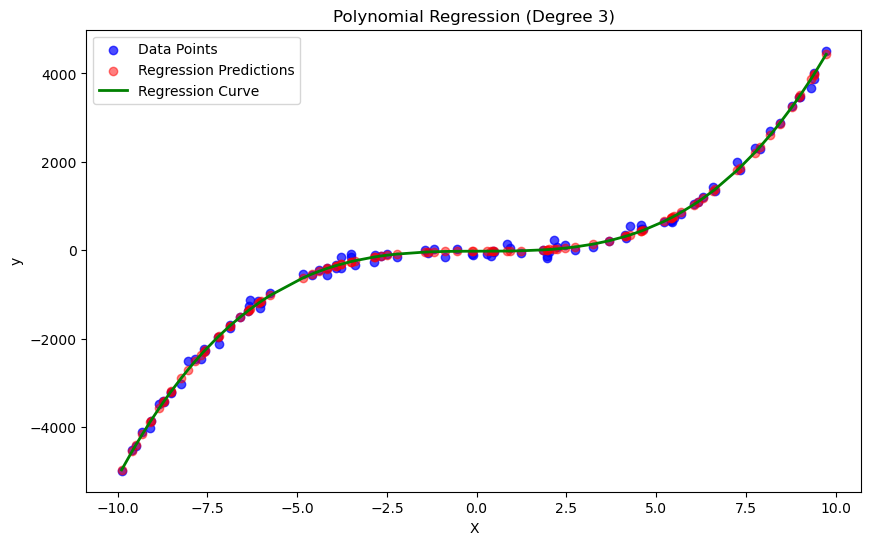

Mean Squared Error: 7724.65


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset
np.random.seed(42)
X = np.random.uniform(-10, 10, 100).reshape(-1, 1)
y = 5 * X**3 - 2 * X**2 + X + np.random.normal(0, 100, size=X.shape)

# Polynomial transformation (degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values
y_pred = model.predict(X_poly)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.7)
plt.scatter(X, y_pred, color='red', label='Regression Predictions', alpha=0.5)

# Plot regression curve (sorted for smoothness)
sorted_indices = np.argsort(X[:, 0])
plt.plot(X[sorted_indices], y_pred[sorted_indices], color='green', label='Regression Curve', linewidth=2)

plt.title('Polynomial Regression (Degree 3)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print model metrics
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Q18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Generate a synthetic dataset
np.random.seed(42)  # For reproducibility
n_samples = 100
n_features = 5

# Generate random features and coefficients
X = np.random.rand(n_samples, n_features)
true_coefficients = np.array([2.5, -1.8, 3.2, 0.7, -2.3])

# Create target variable with some added noise
y = X @ true_coefficients + np.random.randn(n_samples) * 0.5

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Perform multiple linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Step 5: Print the results
print("R-squared score:", r2)
print("Model coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Optional: Compare true coefficients with model coefficients
print("True coefficients:", true_coefficients)

R-squared score: 0.8290778132824698
Model coefficients: [ 2.32647934 -1.91696166  3.52395165  0.7727923  -2.52282008]
Intercept: 0.07299237199349129
True coefficients: [ 2.5 -1.8  3.2  0.7 -2.3]


Q19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line.

Model slope (coefficient): 2.27
Model intercept: 8.08
Mean Squared Error: 20.16


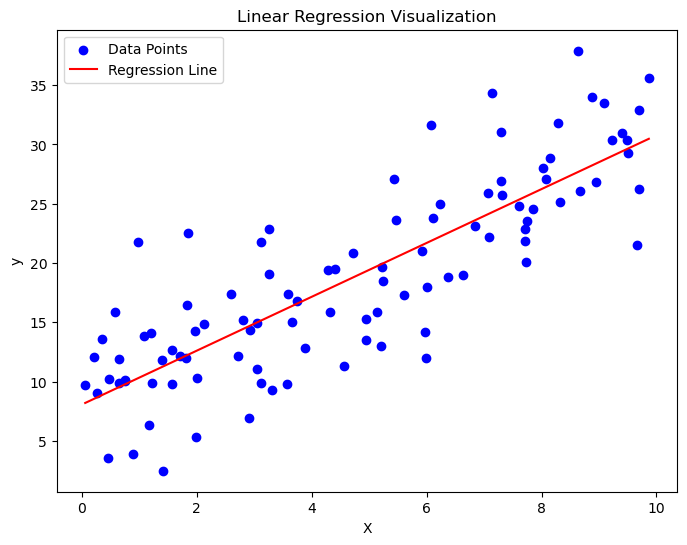

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Generate synthetic data
def generate_data(n_samples=100, noise=5, random_seed=42):
    np.random.seed(random_seed)
    X = np.random.rand(n_samples, 1) * 10  # Feature values in range [0, 10]
    true_slope = 2.5
    true_intercept = 7.0
    y = true_slope * X + true_intercept + np.random.randn(n_samples, 1) * noise  # Add noise
    return X, y

# Step 2: Fit a linear regression model
def fit_model(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

# Step 3: Visualize the data and regression line
def visualize(X, y, model):
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Data Points')
    
    # Generate predictions
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(X_range)
    
    plt.plot(X_range, y_pred, color='red', label='Regression Line')
    plt.title('Linear Regression Visualization')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Main function
def main():
    # Generate data
    X, y = generate_data()
    
    # Fit the model
    model = fit_model(X, y)
    
    # Print model parameters and error
    print(f"Model slope (coefficient): {model.coef_[0][0]:.2f}")
    print(f"Model intercept: {model.intercept_[0]:.2f}")
    print(f"Mean Squared Error: {mean_squared_error(y, model.predict(X)):.2f}")
    
    # Visualize the results
    visualize(X, y, model)

if __name__ == "__main__":
    main()


Q20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's R-squared score and coefficients.

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Create a synthetic dataset
np.random.seed(42)  # For reproducibility
n_samples = 100

# Generate three random features
X = np.random.rand(n_samples, 3) * 10

# Generate the target variable with some noise
y = 5 + 2 * X[:, 0] - 3 * X[:, 1] + 4 * X[:, 2] + np.random.randn(n_samples) * 2

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Perform multiple linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Step 5: Print the results
print("R-squared score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

R-squared score: 0.9605983171134179
Coefficients: [ 2.02117953 -3.0150788   4.13721185]
Intercept: 4.829979116734178


Q21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.

In [53]:
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Step 1: Load the Iris dataset
data = load_iris()
X = data.data  # Feature matrix
y = data.target  # Target vector

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Serialize (save) the model using joblib
model_filename = "random_forest_model.joblib"
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# Step 5: Deserialize (load) the model using joblib
loaded_model = joblib.load(model_filename)
print(f"Model loaded from {model_filename}")

# Step 6: Test the loaded model
y_pred = loaded_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the loaded model: {accuracy:.2f}")

Model saved to random_forest_model.joblib
Model loaded from random_forest_model.joblib
Accuracy of the loaded model: 1.00


Q22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.

In [54]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the tips dataset
tips = sns.load_dataset('tips')

# Select the features and target variable
# Numerical features: 'total_bill'
# Categorical features: 'sex', 'smoker', 'day', 'time'
# Target variable: 'tip'
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time']]
y = tips['tip']

# One-hot encode the categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Display model coefficients
coefficients = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': model.coef_
})
print("\nModel Coefficients:")
print(coefficients)

Mean Squared Error (MSE): 0.653287471292136
R-squared (R²): 0.47735804203610943

Model Coefficients:
       Feature  Coefficient
0   total_bill     0.109262
1   sex_Female    -0.022857
2    smoker_No     0.258975
3      day_Fri     0.191725
4      day_Sat     0.068092
5      day_Sun     0.258180
6  time_Dinner    -0.186416


Q23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and R-squared score.

Linear Regression Coefficients: [60.5858214  98.65156981 64.55135116 57.06083864 35.61128852]
Linear Regression R-squared: 0.9999994716089702

Ridge Regression Coefficients: [59.81710072 96.9790754  62.99754223 56.33329014 35.20972761]
Ridge Regression R-squared: 0.9997216746205413


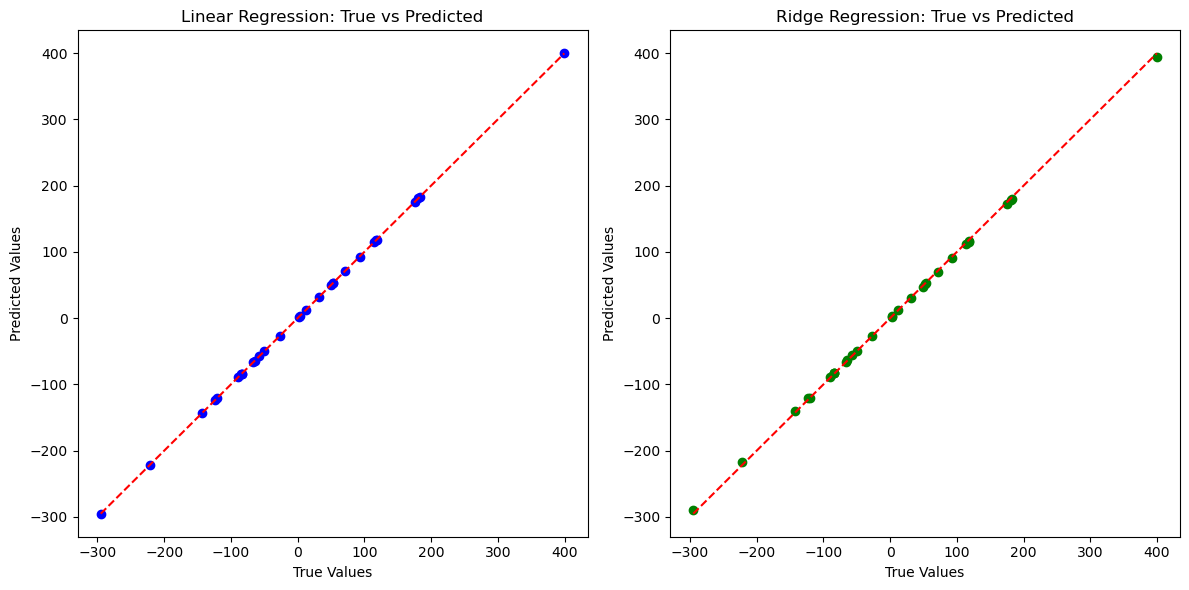

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic dataset
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression and Ridge Regression models
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)

# Fit the models to the training data
lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)

# Make predictions
y_pred_lin = lin_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)

# Calculate R-squared and coefficients
r2_lin = r2_score(y_test, y_pred_lin)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print results
print("Linear Regression Coefficients:", lin_reg.coef_)
print("Linear Regression R-squared:", r2_lin)
print("\nRidge Regression Coefficients:", ridge_reg.coef_)
print("Ridge Regression R-squared:", r2_ridge)

# Plot the true vs predicted values for both models
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, color='blue', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Linear Regression: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Ridge Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='green', label='Ridge Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Ridge Regression: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

Q24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.

In [56]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

# Generate a synthetic dataset
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Perform cross-validation to evaluate the model's performance
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared error to positive and calculate the mean and standard deviation
mse_scores = -cv_scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

# Print the results
print(f"Mean Squared Error for each fold: {mse_scores}")
print(f"Average Mean Squared Error: {mean_mse}")
print(f"Standard Deviation of MSE: {std_mse}")

Mean Squared Error for each fold: [0.01053715 0.01529702 0.00743393 0.01233143 0.00725931]
Average Mean Squared Error: 0.010571768262345954
Standard Deviation of MSE: 0.0030411839797892196


Q25. Write a Python script that compares polynomial regression models of different degrees and prints the R-squared score for each.

Degree 1: R-squared = 0.9310
Degree 2: R-squared = 0.9909
Degree 3: R-squared = 0.9911
Degree 4: R-squared = 0.9906
Degree 5: R-squared = 0.9910


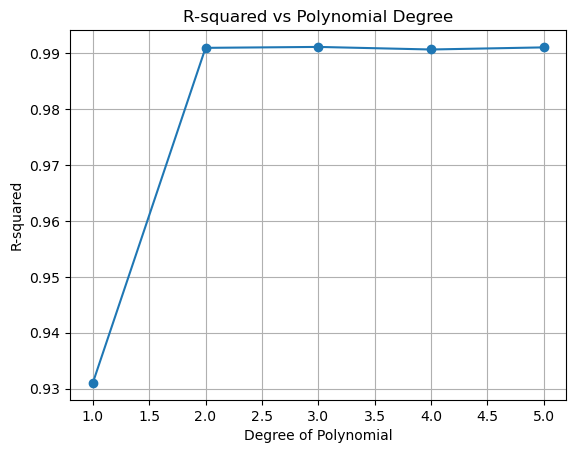

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Example data: X is feature data, y is target data
# You can replace this with your own dataset
X = np.random.rand(100, 1) * 10  # Random feature data
y = 2 * X**2 + 3 * X + 5 + np.random.randn(100, 1) * 5  # Quadratic relationship with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of degrees to test for polynomial regression
degrees = [1, 2, 3, 4, 5]

# Initialize a dictionary to store R-squared scores
r_squared_scores = {}

# Loop through different polynomial degrees
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_poly_test)
    
    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    r_squared_scores[degree] = r2
    
    # Print the R-squared score for the current degree
    print(f"Degree {degree}: R-squared = {r2:.4f}")

# Plot the R-squared scores for each degree
plt.plot(degrees, list(r_squared_scores.values()), marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R-squared')
plt.title('R-squared vs Polynomial Degree')
plt.grid(True)
plt.show()